# Opening and Exploring FITS files

## FITS files are the standard astronomical image format
At some point, probably fairly quickly in your astronomy career, you will encounter FITS files. 99 times out of 100, they will be astronomical images. That last 1% is reserved for those special occasions when a FITS file is actually a table. This case will be dealt with in another example.

For now, lets look at what this example will show you. It will:

* Show you how to load in a FITS file and see what it contains
* Go through FITS headers, keywords, and what they mean
* Have a look at FITS data, and briefly show what you can do with it (data manipulation and presentation will be covered in other examples)

So, lets get started. 

## Introducing AstroPy - A Python Astronomers Best Friend! (And Worst Nightmare!)
It should come as a surprise to noone that, as with anything that Python can be used for, astronomy has a thriving Python community, and one of the largest and most well used modules is AstroPy. AstroPy is extremely versetile, packed full of useful tools, many of which will be covered in other examples and tutorials. As such, the AstroPy [documentation](https://docs.astropy.org/en/stable/index.html) is extensive and very, very through. This is both a blessing and a curse. All the information you could ever want is in there... somewhere. Knowing where is an art in and of itself. You will get there, dont worry! 

This tutorial is concerned with reading in and writing out FITS files. This is handled by the ``astropy.io.fits`` module. And you can go to the AstroPy documentation and find the section relating to [just FITS file handling](https://docs.astropy.org/en/stable/io/fits/index.html) and look up everything you need there. But there is a **LOT** of information to take in. So this example goes over just a fraction of it. Just the basics of taking a first look at a FITS file.

## Importing AstroPy's input/output FITS module and opening a FITS file
This example comes, rather handily, with its own little FITS image file. AstroPy has some example files too, but having one on disc is rather nice. It's a very simple file, designed to mimic a *Herschel* SPIRE photometry image, probably in the 350 micon band. Dont worry about this too much. It could be literally any image. 

The first thing we need to do is import the right module.

As a quick note, this example will be using Python 3.8.3, and Anaconda 2020.07, which comes with AstroPy 4.0.1. BUT, this code should work with Python 2.7 and Astropy 2 or better. Really, you sould try to switch to Python 3, but a lot of astronomy is stuck in the mud, and still uses Python 2.7. It's not a big deal, though there are a few key differences. If you ask for help online, most people will assume you are using Python 3.

In [4]:
from astropy.io import fits # We are just importing the fits module from astropy

In [6]:
# Define path to the example fits file
path_to_file = './Data/ExampleFITS.fits'

# Read in the fits file with fits.open
# HDU is the term used for a Header Data Unit - a "thing" that contains both "header" information and "data" information
# FITS files can contain multiple HDUs, composed into a List.
HDUList = fits.open(path_to_file)

# Lets check out what the HDUList contains!
HDUList.info()

Filename: ./Data/ExampleFITS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (500, 500)   float64   


The ``.info`` method prints out all the information from the HDU List. In general, each HDU contains some information regarding the file. These may be images or image cubes (or even hypercubes with more than 3 dimensions!) with associated headers which tell you what each image contains, or they may be headers without images which contain information regarding the file itself, such as when it was created, or what telescope was used. Sometimes, an HDU might be something like a table. Dont worry if some of this is confusing, it will be explained in a moment.

For now, it is just important to note that when opened this way, HDU Lists can contain more than one HDU, and some of those might be image/header pairs. These pairs may each tell a different part of the story. The first pair is usually the *data* pair. This is the actual observation. The second pair may be a corresponding map of the noise, or some other secondary information. 

It is also worth noting that sometimes, while the first image/header pairing in an HDU List SHOULD be the *data*, the PrimaryHDU is not always an image/header pair. Instead, it is often just a header, giving overall information about the observing run. So just be careful. If you use the ``.info`` method and ``PRIMARY`` does not have any Dimensions listed, then there is no image data there.

Lets go back to our example FITS file. In our case, there is only one HDU, and it appears to contain an image (as shown by the Dimensions having a physical size) and a header (shown by the number of Cards). So lets select this HDU and see what it contains.

In [9]:
# Save the first (and in this case, only) element of HDUList to a new variable
HDU = HDUList[0]

# Now print out the header
HDU.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
BUNIT   = 'MJy/sr  '           / Unit of the data                               
CRPIX1  =                249.5 / [] WCS: Reference pixel position axis 1        
CRPIX2  =                249.5 / [] WCS: Reference pixel position axis 2        
CRVAL1  =                  0.0 / [] WCS: First coordinate of reference pixel    
CRVAL2  =                  0.0 / [] WCS: Second coordinate of referene pixel    
CDELT1  = -0.00027777777777777 / [] WCS: Pixel scale axis 1, unit=Angle         
CDELT2  = 0.000277777777777777 / [] WCS: Pixel scale axis 2, unit=Angle         
CTYPE1  = 'RA---TAN'        

This is the header of this particular image/header pair. It's the header that really give FITS files their power and versitility. What you can see are a number of *Cards* (16 of them - just as ``.info`` said there would be!), each of which tells us something about the HDU. The name of the Card is on the left, its value is in the middle, and a description (which is optional, and all too often it is missing!) is on the right. Lets go through them.

* ``SIMPLE`` tells us if the header and data conform to the FITS standard. The FITS standard can be found online, and its very complex. Luckily, you dont need to worry about this card in 99% of cases. 
* ``BITPIX`` tells you the type of the data stored in the pixels of the image. Unlike a PNG or JPEG, FITS images are not limited to 3 colour channels with values ranging from 0 to 255. Instead, they can be assigned a type, such as ``INT``, or ``FLOAT``. In this case, the value tells us that the data is in the form of 64-bit signed double-precision floating-point numbers. Again, you dont really need to worry about this. 
* ``NAXIS`` tells you the number of axes the data has. In this case, its 2. So its a 2D image or array. 
* ``NAXIS1`` tells you the number of elements, or in this case, pixels, in the first (x) axis
* ``NAXIS2`` is the same as above, but for the second (y) axis
* ``BUNIT`` tells you what units the data is presented in. Here, its in MJy/sr, or MegaJansky per Steradian. 
* ``CRPIX1`` is the pixel or element coordinate in the x axis of the reference pixel, or the point in the image grid that is used for reference
* ``CRPIX2`` is, similarly, the y-coordinate of the reference pixel.
* ``CRVAL1`` is the real world x-coordinate of the reference pixel. Think of ``CRVAL`` and ``CRPIX`` being the absolute and relative coordinates of a point outside your house. ``CRVAL`` is the Latitude and Longitude of that point, while ``CRPIX`` is saying "2 steps forward and 5 steps to the left from the starting point (my front door)". 
* ``CRVAL2`` is, therefore, the real world y-coordiante of the reference pixel.
* ``CDELT1`` is how big a pixel is along the x axis in real world units. Usually this is in degrees. ``unit=Angle`` is a common, allbeit confusing shorthand for degree. Notice that the value of ``CDELT1`` is negative here? That is because in this coordinate system (see ``CTYPE`` below), "East" and "West" are backwards. Dont worry too hard about this. It's to do with how these compass directions flip when you look up at the inside of something (the sky), vs down at the outside (the Earth). 
* ``CDELT2`` is the same but for the y axis size of the pixels.
* ``CTYPE1`` is the coordinate system of the x axis. Like cartesian or polar coordinates. In the case of astronomy, it's usually either ``RA---TAN`` or ``GLON-TAN`` for Right Ascention or Galactic Latitude coordinates. It is easy to say that extragalactic studies tend to use Galacto-centric coordinates, and galactic studies use RA, but that is not always true. There are also other coordinate types. The TAN refers to the type of projection - basically how these Cartesian or polar coordinate systems are mapped onto a sphere. Dont worry too much here either. Just be aware if it's saying it's in RA or Galacto-centric coordinates.
* ``CTYPE2`` is the corresponding y-axis coordiante system. Right Ascention pairs with Declination and Galactic Longitude pairs with Galactic Latitude. 
* ``CROTA2`` gives the roation of the pixel grid (usually in degrees) from "North". This is "North" relative to whichever coordinate system is defined by ``CTYPE2``. There is a ``CROTA1`` as well, but it is rarely used.
* ``EQUINOX`` gives the celestial reference frame that these coordinates are defined in. The stars shift in the sky relative to the Earth over time, and we keep having to update our point of reference. It's not a huge shift, but it does make an impact. Most observations use the J2000 equinox, and that is indeed what is used here. 

These cards represent the bare minimum that a FITS file **SHOULD** contain. In fact, if you were to remove some of these, the FITS file would actually stop working. With all these pieces of information, you can find out what your data means and accurately determine which pixel represents which patch of the sky, how big that patch is, and how that patch relates to another patch. Without these cards, a FITS file is just an array of numbers with no meaning.

Headers can contain more information than this, telling you the telescope name, the date of the observation, the wavelength, etc. And strictly speaking, the ``EQUINOX`` card is not needed. And some programmes may allow you to get away without some of the other cards presented here. But then those programmes will make guesses as to what the missing cards **SHOULD** be, and if that guess is different to your intentions, thats when you have issues. Most astronomers are very good with getting this right, but just be on the look out. 

So, if we can get all that from the header, what secrets does the data hold?

In [10]:
HDU.data

array([[57.1582971 , 56.0344037 , 55.05799338, ..., 61.6477223 ,
        59.74748442, 58.54080612],
       [57.80679927, 57.40806126, 56.45488575, ..., 60.02042097,
        58.49286959, 58.01716117],
       [58.04747353, 58.62793563, 58.1354998 , ..., 59.76225168,
        58.39100253, 57.82478042],
       ...,
       [57.72481412, 56.3163637 , 54.87576181, ..., 65.85475515,
        63.61420536, 60.60710851],
       [56.9451628 , 55.69484334, 53.61506809, ..., 65.08649464,
        62.20322275, 58.77681633],
       [56.65269633, 55.76387851, 54.15339423, ..., 63.74272932,
        60.9467891 , 58.35169432]])

OK, not as exciting. But there is some useful information here. For a start, we can see that the data is an array, and that it is filled with numbers. So we can probably play around with it in Numpy. Lets import Numpy and have a look!

In [11]:
import numpy as np # For those new to python, we always shorten numpy to np like this.

print(HDU.data.shape)
print(np.mean(HDU.data))
print(np.std(HDU.data))

(500, 500)
78.83612962076286
60.21584946841086


By printing the shape of the data, we can see that it is a 2D array with 500 elements on each side. We actually already knew this, thanks to the header. If the two axes are different lengths, you might notice something odd. A FITS header lists it's axes in the form X, Y. So ``NAXIS1`` refers to the X axis, or the axis along the bottom. But Numpy refers to it's axes in reverse, so Y, X. Just keep that in mind. It will save you a headache later.  

We can also see that the mean value in the array is 78.8, and the standard deviation of the array is 60.2. All useful stuff.

It is worth a quick note that this is a synthetic observation. I made it myself, and I know that every single element contains a real number. Real observations tend to have blank regions at their edges, called NaNs or Not-a-Number values. This can mess up getting the mean and standard deviation, or summing things together. Numpy can actually handle this though.

In [12]:
print(np.nanmean(HDU.data))
print(np.nanstd(HDU.data))

78.83612962076286
60.21584946841086


See? Just the same. ``nanmean`` and its fellows will ignore NaN values automatically, giving you the mean, standard deviation, sum, maximum, etc, of whatever is left. Very handy.

So we can see that the data in a FITS HDU is just a Numpy array, and so all the standard mathematical oparations that can be done on or with Numpy, can also be done to the data part of a FITS file. It might be worth taking a copy of the data first though, to avoid strange behaviour with overwriting the original. 

In [14]:
HDU_data = HDU.data
HDU_data_copy = HDU_data.copy()

print(np.nansum(HDU_data))
print(np.nansum(HDU_data_copy))
HDU_data_copy = HDU_data_copy * 0.1
print(np.nansum(HDU_data))
print(np.nansum(HDU_data_copy))

19709032.405190714
19709032.405190714
19709032.405190714
1970903.240519072


Sometimes this matters, sometimes it does not. So be safe, and always make a copy.

OK, one last thing. Looking at raw arrays isn't very fun. Lets look at an image of the data. We wont get too fancy, there are other examples to cover displaying astronomical images. Lets just import PyPlot and use the ``imshow`` method. 

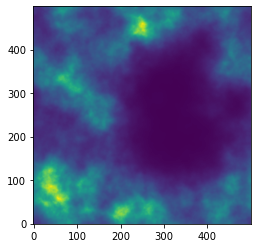

In [15]:
import matplotlib.pyplot as plt # Just like with numpy, pyplot is shortened to plt

plt.imshow(HDU.data, origin = 'lower')

Wow, isnt that pretty! There it is, the data we have been working with all this time. 

Now, ok, I slipped in a little thing there. Remember when I said Numpy reverses the order of the axes? Well it also puts 0,0 in the top left, rather than the bottom left. PyPlot is smart enough to actually display the x axis along the bottom and the y axis along the side, but unless you tell it to put the ``origin`` in the ``'lower'`` position, your image will be upsidedown. Not an issue for simulated data, but it can lead to a lot of confusion when visualising real observations. 

And thats more or less it. Thats how to open a FITS file, see whats in it, and examine a header and data HDU. That is more or less all you will ever need. 

Now, your data may be more complex, having 3 or more axes, or perhaps your FITS file itself contains many HDUs. But as for the basics, this is all of it!

Well... nearly.

## A common and really good shortcut
Most people only ever want to deal with the observations in a FITS file. If you know your FITS file only contains one HDU, and that HDU contains both the header and data for the observation, then thats where these two shortcut commands come into play. 

In [18]:
header = fits.getheader(path_to_file)
data = fits.getdata(path_to_file)

header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
BUNIT   = 'MJy/sr  '           / Unit of the data                               
CRPIX1  =                249.5 / [] WCS: Reference pixel position axis 1        
CRPIX2  =                249.5 / [] WCS: Reference pixel position axis 2        
CRVAL1  =                  0.0 / [] WCS: First coordinate of reference pixel    
CRVAL2  =                  0.0 / [] WCS: Second coordinate of referene pixel    
CDELT1  = -0.00027777777777777 / [] WCS: Pixel scale axis 1, unit=Angle         
CDELT2  = 0.000277777777777777 / [] WCS: Pixel scale axis 2, unit=Angle         
CTYPE1  = 'RA---TAN'        

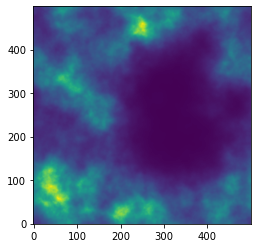

In [19]:
plt.imshow(data, origin = 'lower')

You can see that ``.getheader`` and ``.getdata`` bypass the HDU List and just grab the header and data from the first HDU. Take care though. If your first HDU only contains a header, then ``.getheader`` will grab that, and ``.getdata`` will grab the data from the **SECOND** HDU. So these two commands are great, and mean you dont have to deal with HDU Lists and 